In [2]:
import filterpy.kalman
import filterpy.common
import matplotlib.pyplot as plt
import numpy as np
import numpy.random

Simulation of the sensor

In [3]:
def simulateSensor(samplesCount, noiseSigma, dt):
   # Noise with standard normal distribution, m = 0, standard deviation = noiseSigma
   noise = numpy.random.normal(loc = 0.0, scale = noiseSigma, size = samplesCount)

   trajectory = np.zeros((3, samplesCount))

   position = 0
   velocity = 0.0
   acceleration = 0.0

   for i in range(1, samplesCount):
       position = position + velocity * dt + (acceleration * dt ** 2) / 2.0
       velocity = velocity + acceleration * dt
       acceleration = acceleration

       # Movement with constant velocity
       if(i == (int)(samplesCount * 0.2)):
           velocity = 10.0

       # Movement with constant accelelration
       if (i == (int)(samplesCount * 0.6)):
           acceleration = 10.0

       trajectory[0][i] = position
       trajectory[1][i] = velocity
       trajectory[2][i] = acceleration

   measurement = trajectory[0] + noise

   return trajectory, measurement

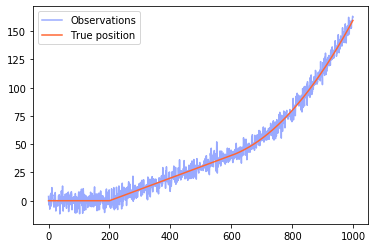

In [4]:
import matplotlib.pyplot as plt

dt = 0.01
measurementSigma = 5      # Covariance matrix R (standard deviation for the sensor)
trajectory, measurement = simulateSensor(1000, measurementSigma, dt)
 
plt.plot(measurement, label="Observations", color="#99AAFF")
plt.plot(trajectory[0], label="True position", color="#FF6633")
plt.legend()
plt.show()

Simple case with x_t as a position only

In [25]:
processNoiseVariance = 1e-4          # Covariance matrix Q

In [26]:
# Creation of new object KalmanFilter
filter = filterpy.kalman.KalmanFilter(dim_x=1,      
                                     dim_z=1)     

filter.F = np.array([ [1.0]])

filter.H = np.array([[1.0]])
 
filter.Q = processNoiseVariance
 
filter.R = np.array([[measurementSigma*measurementSigma]])
 
filter.x = np.array([0.0])
 
filter.P = np.array([[10.0]])

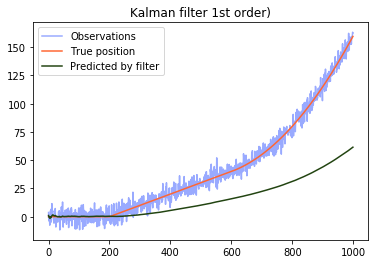

In [27]:
filteredState = []
stateCovarianceHistory = []

for i in range(0, len(measurement)):
   z = [ measurement[i] ]                      
   filter.predict()                            # Prediction step
   filter.update(z)                            # Correction step

   filteredState.append(filter.x)
   stateCovarianceHistory.append(filter.P)

filteredState = np.array(filteredState)
stateCovarianceHistory = np.array(stateCovarianceHistory)

plt.title("Kalman filter 1st order)")
plt.plot(measurement, label="Observations", color="#99AAFF")
plt.plot(trajectory[0], label="True position", color="#FF6633")
plt.plot(filteredState[:, 0], label="Predicted by filter", color="#224411")
plt.legend()
plt.show()

 More complicated case with x_t as a (position, velocity) vector

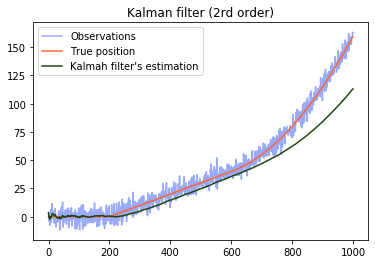

In [8]:
filter2 = filterpy.kalman.KalmanFilter(dim_x=2,     
                                     dim_z=1)      

filter2.F = np.array([ [1,   dt],
                     [0,   1.0]])

filter2.H = np.array([[1.0, 0.0]])

filter2.Q = filterpy.common.Q_discrete_white_noise(dim=2, dt=dt, var=processNoiseVariance)
 
filter2.x = np.array([0.0, 0.0])
 
filter2.P = np.array([[10.0, 0.0],
                      [0.0, 10.0]])

filteredState2 = []
stateCovarianceHistory2 = []
 
for i in range(0, len(measurement)):
   z = [ measurement[i] ]                      
   filter2.predict()                            
   filter2.update(z)                            

   filteredState2.append(filter2.x)
   stateCovarianceHistory2.append(filter2.P)

filteredState = np.array(filteredState2)
stateCovarianceHistory = np.array(stateCovarianceHistory2)

plt.title("Kalman filter (2rd order)")
plt.plot(measurement, label="Observations", color="#99AAFF")
plt.plot(trajectory[0], label="True position", color="#FF6633")
plt.plot(filteredState[:, 0], label="Kalmah filter's estimation", color="#224411")
plt.legend()
plt.show()

Complete case with x_t as a (position, velocity, acceleration) vector

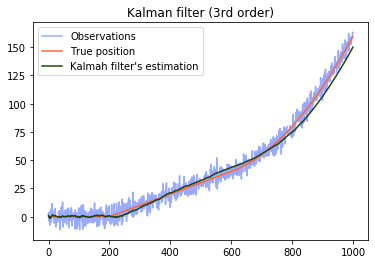

In [9]:
filter3 = filterpy.kalman.KalmanFilter(dim_x=3,    
                                     dim_z=1)      
 
filter3.F = np.array([ [1,   dt,     (dt**2)/2],
                     [0,   1.0,    dt],
                     [0,   0,      1.0]])
 
filter3.H = np.array([[1.0, 0.0, 0.0]])
 
filter3.Q = filterpy.common.Q_discrete_white_noise(dim=3, dt=dt, var=processNoiseVariance)
 
filter3.R = np.array([[measurementSigma*measurementSigma]])
 
filter3.x = np.array([0.0, 0.0, 0.0])
 
filter3.P = np.array([[10.0, 0.0,  0.0],
                    [0.0,  10.0, 0.0],
                    [0.0,  0.0,  10.0]])

filteredState3 = []
stateCovarianceHistory3 = []
 
for i in range(0, len(measurement)):
   z = [ measurement[i] ]                      
   filter3.predict()                            
   filter3.update(z)                            

   filteredState3.append(filter3.x)
   stateCovarianceHistory3.append(filter3.P)

filteredState = np.array(filteredState3)
stateCovarianceHistory = np.array(stateCovarianceHistory3)

plt.title("Kalman filter (3rd order)")
plt.plot(measurement, label="Observations", color="#99AAFF")
plt.plot(trajectory[0], label="True position", color="#FF6633")
plt.plot(filteredState[:, 0], label="Kalmah filter's estimation", color="#224411")
plt.legend()
plt.show()